# Postprocessing

Makes control plots and templates.

Authors: Raghav Kansal, Cristina Suarez

In [7]:
import os
from HH4b import utils, plotting, postprocessing
from HH4b.postprocessing import Region, weight_shifts
from HH4b.utils import ShapeVar, CUT_MAX_VAL
from HH4b.hh_vars import samples, data_key, bg_keys, sig_keys, LUMI

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib.ticker as mticker

from copy import deepcopy

plt.style.use(hep.style.CMS)
hep.style.use("CMS")
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 16})

In [2]:
# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

In [9]:
MAIN_DIR = "../../../"
# this is the directory to the files
# path_to_dir = "/eos/uscms/store/user/cmantill/bbbb/skimmer/Oct13Test/"
# path_to_dir = f"{MAIN_DIR}/../data/skimmer/Oct19wSelection/"
path_to_dir = f"{MAIN_DIR}/../data/skimmer/Oct26/"
year = "2022EE"

# make plot and template directory
date = "23Nov9"
plot_dir = f"{MAIN_DIR}/plots/PostProcessing/{date}/{year}"
template_dir = f"templates/{date}/"
_ = os.system(f"mkdir -p {plot_dir}")
_ = os.system(f"mkdir -p {template_dir}/cutflows/{year}")

In [10]:
# define dictionary with directories of files (this can be configured in a yaml file later in the script)
samples = deepcopy(samples[year])
sig_keys = ["hh4b"]
for key in list(samples.keys()):
    if key not in bg_keys + sig_keys + [data_key]:
        del samples[key]

sample_dirs = {path_to_dir: samples}

In [12]:
# columns to load
# the parquet files are too big so we can only load a few columns at a time without consumming much memory
load_columns = [
    ("weight", 1),
    # ("DijetMass", 1),
    ("ak8FatJetPt", 2),
    ("ak8FatJetPNetXbb", 2),
    ("ak8FatJetMsd", 2),
    ("ak8FatJetPNetMass", 2),
    ("ht", 1),
    ("nPV", 1),
    # ("single_weight_pileup", 1),
]

load_columns_mc = load_columns + [("single_weight_pileup", 1), ("single_weight_genWeight")]
# + [(f"weight_{syst}_{shift}", 1) for syst in weight_shifts for shift in ["up", "down"]]

In [ ]:
df = pd.read_parquet("../../../../data/skimmer/Oct26/2022EE/GluGluHto2B_PT-200_M-125/parquet")
list(df.columns)

In [ ]:
df = pd.read_parquet(
    "../../../../data/skimmer/Oct19wSelection/2022EE/GluGlutoHHto4B_kl-0p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV_TSG/parquet"
)
list(df.columns)

In [ ]:
hhcf = utils.get_cutflow(
    "../../../../data/skimmer/Oct26/2022EE/GluGlutoHHto4B_kl-0p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV_TSG/pickles",
    year,
    "GluGlutoHHto4B_kl-0p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV_TSG",
)
hhcf

In [32]:
pt_cut = 300

filters = [
    [
        ("('ak8FatJetPt', '0')", ">=", pt_cut),
        ("('ak8FatJetPt', '1')", ">=", pt_cut),
        ("('ak8FatJetMsd', '0')", ">=", 60),
        ("('ak8FatJetMsd', '1')", ">=", 60),
        # ("('ak8FatJetPNetXbb', '0')", ">=", 0.8),
    ],
    [
        ("('ak8FatJetPt', '0')", ">=", pt_cut),
        ("('ak8FatJetPt', '1')", ">=", pt_cut),
        ("('ak8FatJetMsd', '0')", ">=", 60),
        ("('ak8FatJetMsd', '1')", ">=", 60),
        # ("('ak8FatJetPNetXbb', '1')", ">=", 0.8),
    ],
]

# save cutflow as pandas table
cutflow = pd.DataFrame(index=list(samples.keys()))

# dictionary that will contain all information (from all samples)
events_dict = {}
for input_dir, samples in sample_dirs.items():
    events_dict = {
        **events_dict,
        # this function will load files (only the columns selected), apply filters and compute a weight per event
        **utils.load_samples(
            input_dir,
            samples,
            year,
            filters=filters,
            columns=utils.format_columns(load_columns),
            # columns_mc=utils.format_columns(load_columns_mc),
        ),
    }

utils.add_to_cutflow(events_dict, "Preselection", "weight", cutflow)
print("\n", cutflow)

Loading GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV_TSG
Loading QCD_HT-2000
Loading QCD_HT-400to600
Loading QCD_HT-800to1000
Loading QCD_HT-600to800
Loading QCD_HT-1500to2000
Loading QCD_HT-200to400
Loading QCD_HT-1000to1200
Loading QCD_HT-1200to1500
Loading QCD_HT-100to200
Loading Run2022G
Loading Run2022F
Loading TTto2L2Nu
Loading TTtoLNu2Q
Loading TTto4Q


Loading GluGluHto2B_PT-200_M-125
Loading VBFHto2B_M-125_dipoleRecoilOn
Loading WplusH_Hto2B_WtoLNu_M-125
Loading ggZH_Hto2B_Zto2L_M-125
Loading WplusH_Hto2B_Wto2Q_M-125
Loading WminusH_Hto2B_Wto2Q_M-125
Loading ggZH_Hto2B_Zto2Q_M-125
Loading ZH_Hto2B_Zto2Q_M-125
Loading WminusH_Hto2B_WtoLNu_M-125
Loading ggZH_Hto2B_Zto2Nu_M-125
Loading ttHto2B_M-125
Loading WW
Loading ZZ
Loading WZ
Loading Wto2Q-3Jets_HT-800
Loading Wto2Q-3Jets_HT-400to600
Loading Zto2Q-4Jets_HT-200to400
Loading Wto2Q-3Jets_HT-600to800
Loading Wto2Q-3Jets_HT-200to400
Loading Zto2Q-4Jets_HT-800
Loading Zto2Q-4Jets_HT-600to800
Loading Zto2Q-4Jets_HT-400to600

           Preselection
hh4b      2.622914e+01
qcd       6.816638e+06
data      6.753816e+06
ttbar     1.360510e+05
gghtobb   3.072498e+02
vbfhtobb  3.699994e+01
vhtobb    1.804486e+02
tthtobb   2.583706e+02
diboson   3.046456e+03
vjets     1.226575e+05


### Weights

Removing high QCD event weight

In [ ]:
plt.hist(events_dict["qcd"]["weight"], bins=np.power(10, np.linspace(-4, 5, 100)))
plt.yscale("log")
plt.xscale("log")
plt.show()

In [35]:
events_dict["qcd"] = events_dict["qcd"][(events_dict["qcd"]["weight"] < 8e2).values]

Checking pileup weights and removing from signal

In [ ]:
fig = plt.figure(figsize=(12, 12))
plt.rcParams.update({"font.size": 24})
plt.hist(
    events_dict["hh4b"]["single_weight_pileup"],
    np.linspace(0, 10, 21),
    histtype="step",
    label="HH4b",
)
plt.hist(
    events_dict["qcd"]["single_weight_pileup"], np.linspace(0, 10, 21), histtype="step", label="QCD"
)
plt.hist(
    events_dict["ttbar"]["single_weight_pileup"],
    np.linspace(0, 10, 21),
    histtype="step",
    label="TT",
)
plt.legend()
plt.yscale("log")
plt.xlabel("Pileup Weights")
plt.ylabel("Events")
hep.cms.label(data=False, year=year, lumi=round(LUMI[year] / 1e3))
plt.savefig(f"{plot_dir}/pileup_weights.pdf", bbox_inches="tight")
plt.show()

In [36]:
events_dict["hh4b"]["weight"] /= events_dict["hh4b"]["single_weight_pileup"]
utils.add_to_cutflow(events_dict, "Fix Weights", "weight", cutflow)
cutflow

,Preselection,Fix Weights
hh4b,2.622914e+01,2.701551e+00
qcd,6.816638e+06,6.770421e+06
data,6.753816e+06,6.753816e+06
ttbar,1.360510e+05,1.360510e+05
gghtobb,3.072498e+02,3.072498e+02
vbfhtobb,3.699994e+01,3.699994e+01
vhtobb,1.804486e+02,1.804486e+02
tthtobb,2.583706e+02,2.583706e+02
diboson,3.046456e+03,3.046456e+03
vjets,1.226575e+05,1.226575e+05


Checking weights without the trigger SFs

In [ ]:
for key, events in events_dict.items():
    if key == data_key:
        events["weight_notrig"] = events["weight"]
    else:
        events["weight_notrig"] = events["weight"] / events["single_weight_trigsf_2jet"]

In [ ]:
_ = plt.hist(events_dict["qcd"]["single_weight_trigsf_2jet"].values, bins=100, histtype="step")

### Control Plots

In [ ]:
ylims = {
    "2022": 1e5,
    "2022EE": 4e5,
}

# {var: (bins, label)}
control_plot_vars = [
    # var must match key in events dictionary (i.e. as saved in parquet file)
    # ShapeVar(var="DijetMass", label=r"$m^{jj}$ (GeV)", bins=[30, 600, 4000]),
    ShapeVar(var="ak8FatJetPt0", label=r"$p_T^{j1}$ (GeV)", bins=[50, 300, 1500]),
    ShapeVar(var="ak8FatJetPt1", label=r"$p_T^{j2}$ (GeV)", bins=[50, 300, 1500]),
    ShapeVar(
        var="ak8FatJetPNetMass0",
        label=r"$m_{reg}^{j1}$ (GeV)",
        bins=[19, 60, 250],
        significance_dir="bin",
    ),
    ShapeVar(
        var="ak8FatJetPNetMass1",
        label=r"$m_{reg}^{j2}$ (GeV)",
        bins=[19, 60, 250],
        significance_dir="bin",
    ),
    ShapeVar(
        var="ak8FatJetMsd0",
        label=r"$m_{SD}^{j1}$ (GeV)",
        bins=[19, 60, 250],
        significance_dir="bin",
    ),
    ShapeVar(
        var="ak8FatJetMsd1",
        label=r"$m_{SD}^{j2}$ (GeV)",
        bins=[19, 60, 250],
        significance_dir="bin",
    ),
    # ShapeVar(
    #     var="ak8FatJetPNetXbb0",
    #     label=r"$T_{Xbb}^{j1}$",
    #     bins=[50, 0.0, 1],
    # ),
    # ShapeVar(
    #     var="ak8FatJetPNetXbb1",
    #     label=r"$T_{Xbb}^{j2}$",
    #     bins=[50, 0.0, 1],
    # ),
    # ShapeVar(
    #     var="ht",
    #     label=r"HT (GeV)",
    #     bins=[50, 0, 4000],
    # ),
]

hists = {}
for shape_var in control_plot_vars:
    if shape_var.var not in hists:
        hists[shape_var.var] = utils.singleVarHist(
            events_dict,
            shape_var,
            weight_key="weight",
        )

for shape_var in control_plot_vars:
    name = f"{plot_dir}/{shape_var.var}.pdf"
    plotting.ratioHistPlot(
        hists[shape_var.var],
        year,
        sig_keys,
        bg_keys,
        name=name,
        show=True,
        log=True,
        plot_significance=False,
        significance_dir=shape_var.significance_dir,
        ratio_ylims=[0.2, 1.8],
        ylim=ylims[year],
    )
    # break

mSD vs mReg

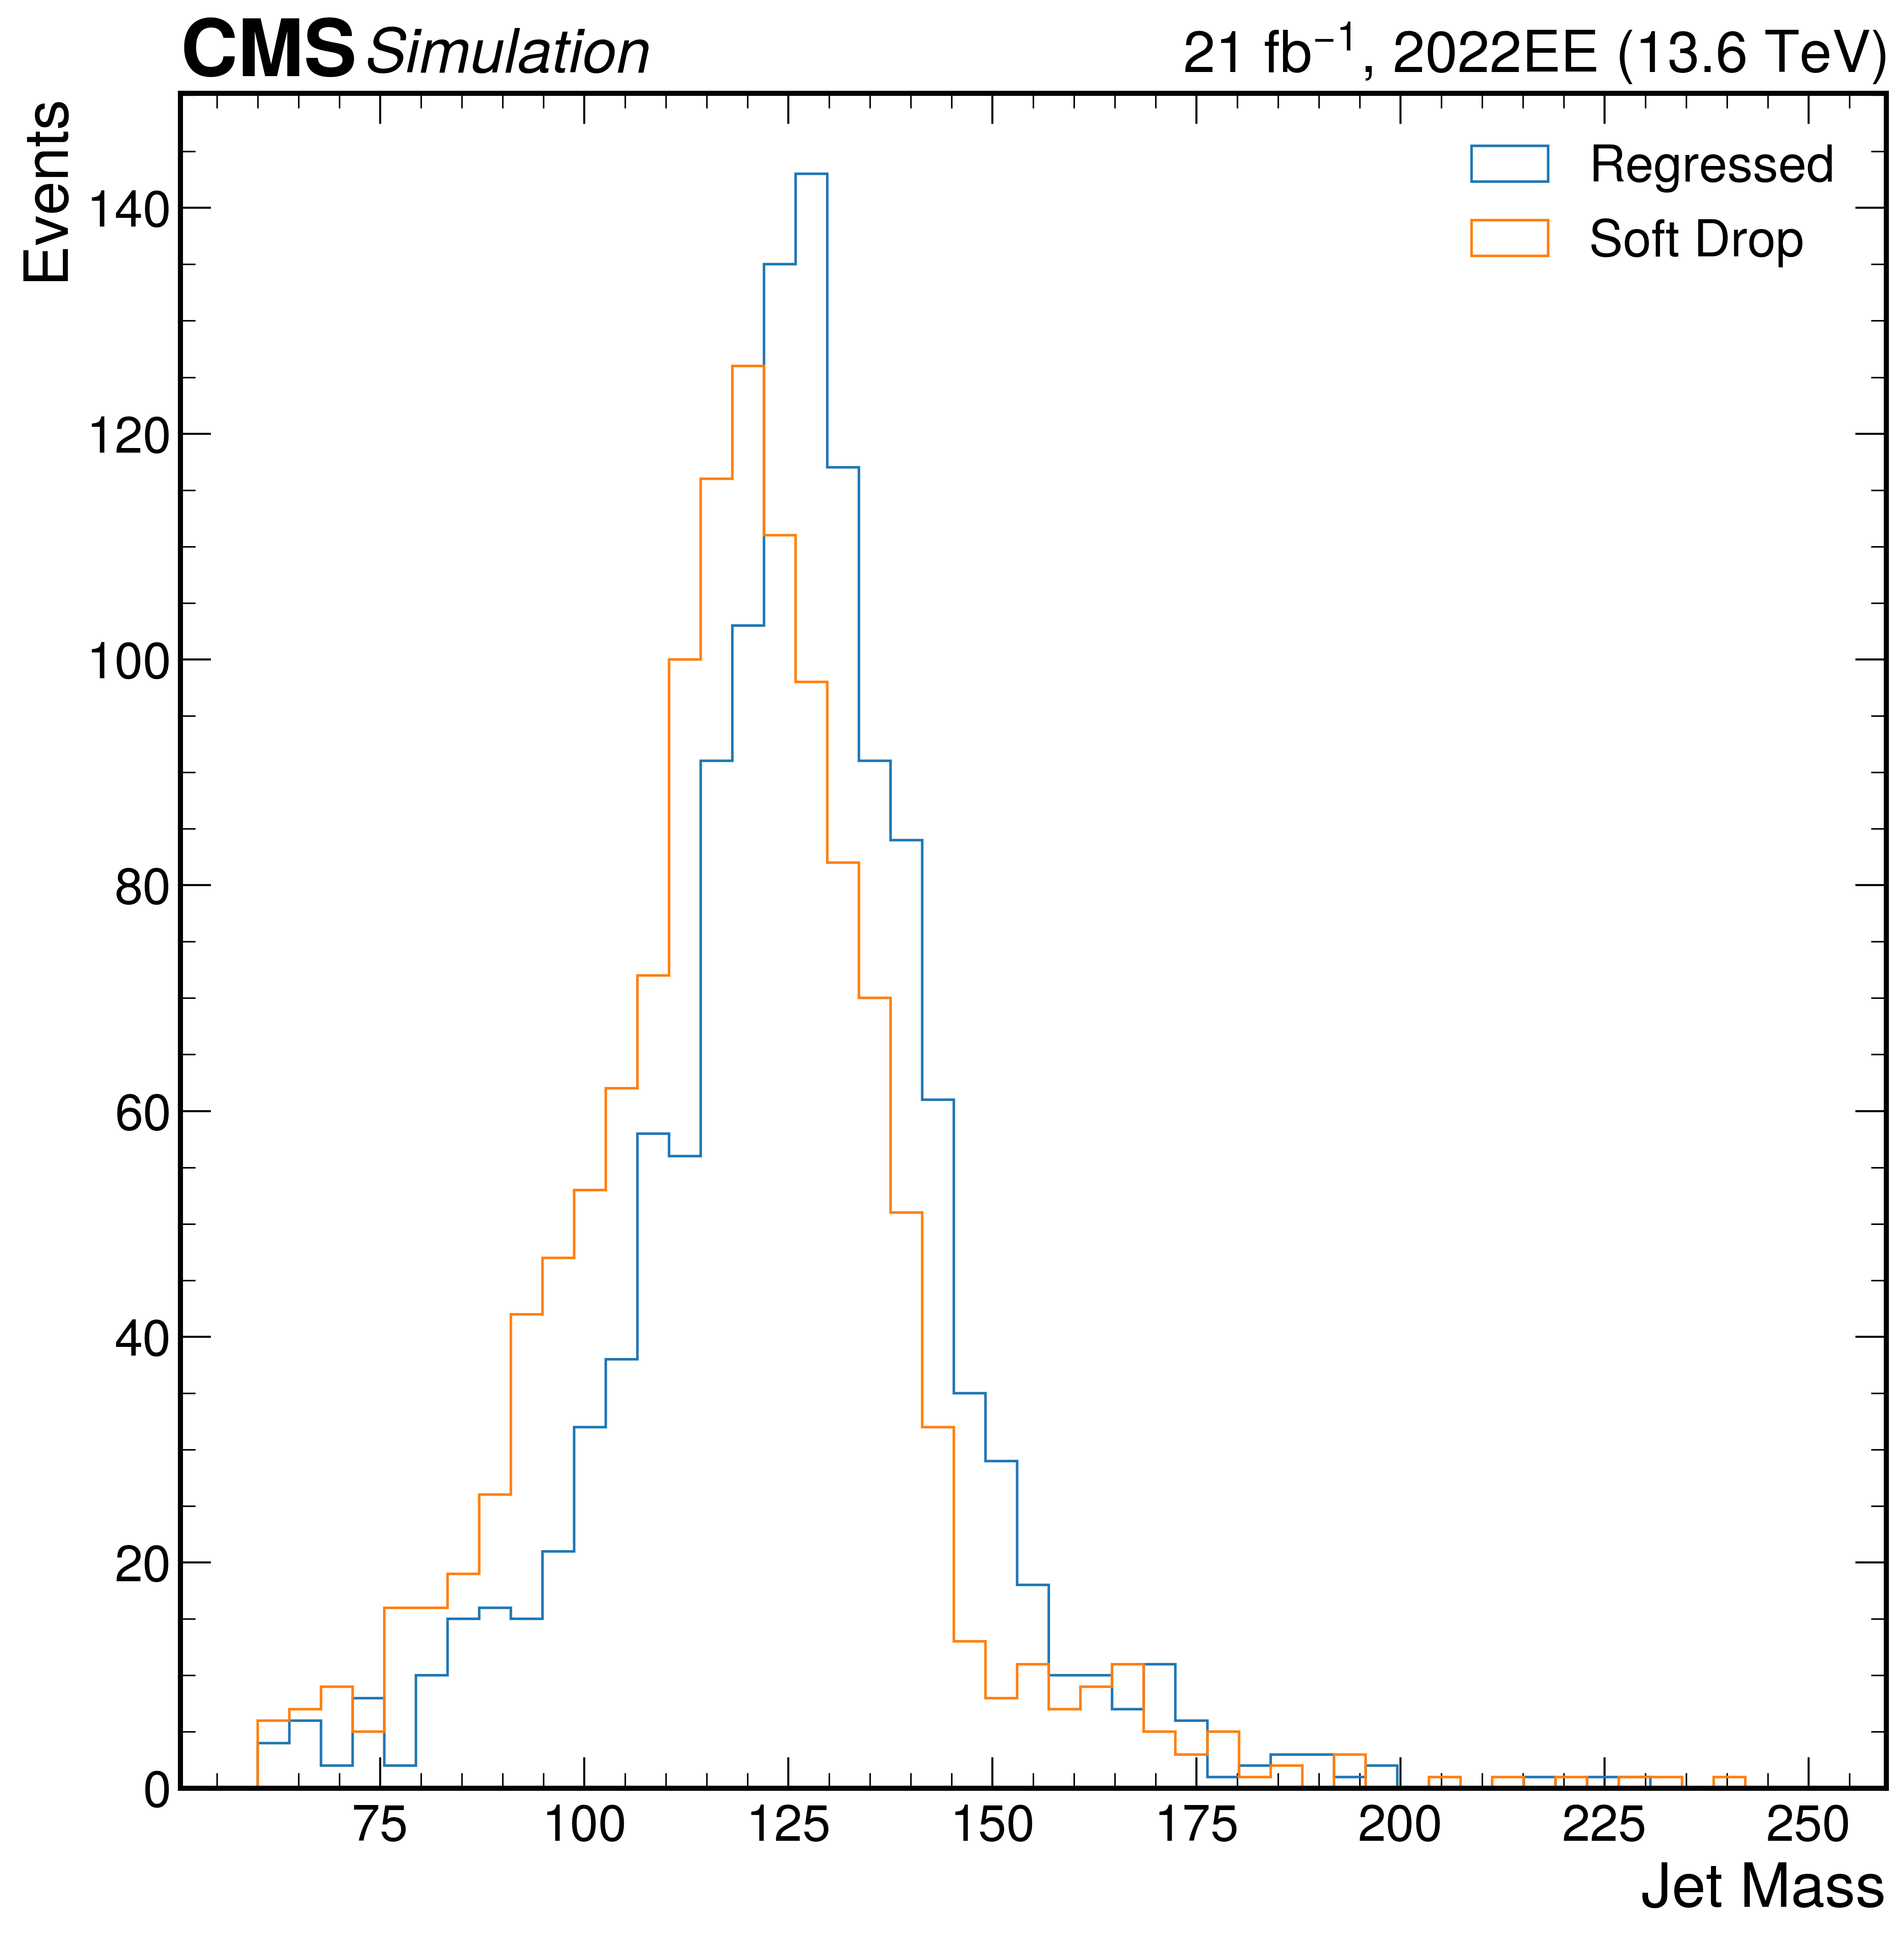

In [31]:
events = events_dict["hh4b"]

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
plt.rcParams.update({"font.size": 24})

bins = np.linspace(60, 250, 50)

ax.hist(
    events["ak8FatJetPNetMass"][1],
    bins=bins,
    histtype="step",
    label="Regressed",
)

ax.hist(
    events["ak8FatJetMsd"][1],
    bins=bins,
    histtype="step",
    label="Soft Drop",
)

ax.set_xlabel("Jet Mass")
ax.set_ylabel("Events")

hep.cms.label(data=False, year=year, lumi=round(LUMI[year] / 1e3), com="13.6")

ax.legend()
plt.savefig(f"{plot_dir}/msd_mreg.pdf", bbox_inches="tight")
plt.show()

Pileup Check

In [ ]:
for key, events in events_dict.items():
    if key in [data_key] + sig_keys:
        events["weight_nopileup"] = events["weight"]
    else:
        events["weight_nopileup"] = events["weight"] / events["single_weight_pileup"]

In [ ]:
# {var: (bins, label)}

# {var: (bins, label)}
control_plot_vars = [
    # var must match key in events dictionary (i.e. as saved in parquet file)
    # ShapeVar(var="DijetMass", label=r"$m^{jj}$ (GeV)", bins=[30, 600, 4000]),
    ShapeVar(var="ak8FatJetPt0", label=r"$p_T^{j1}$ (GeV)", bins=[50, 300, 1500]),
    ShapeVar(var="ak8FatJetPt1", label=r"$p_T^{j2}$ (GeV)", bins=[50, 300, 1500]),
    ShapeVar(
        var="ak8FatJetPNetMass0",
        label=r"$m_{reg}^{j1}$ (GeV)",
        bins=[19, 60, 250],
        significance_dir="bin",
    ),
    ShapeVar(
        var="ak8FatJetPNetMass1",
        label=r"$m_{reg}^{j2}$ (GeV)",
        bins=[19, 60, 250],
        significance_dir="bin",
    ),
    ShapeVar(
        var="ak8FatJetMsd0",
        label=r"$m_{SD}^{j1}$ (GeV)",
        bins=[19, 60, 250],
        significance_dir="bin",
    ),
    ShapeVar(
        var="ak8FatJetMsd1",
        label=r"$m_{SD}^{j2}$ (GeV)",
        bins=[19, 60, 250],
        significance_dir="bin",
    ),
    # ShapeVar(
    #     var="ak8FatJetPNetXbb0",
    #     label=r"$T_{Xbb}^{j1}$",
    #     bins=[50, 0.0, 1],
    # ),
    # ShapeVar(
    #     var="ak8FatJetPNetXbb1",
    #     label=r"$T_{Xbb}^{j2}$",
    #     bins=[50, 0.0, 1],
    # ),
    # ShapeVar(var="nPV", label=r"nPV", bins=[20, 0, 80])
    # ShapeVar(
    #     var="ht",
    #     label=r"HT (GeV)",
    #     bins=[50, 0, 4000],
    # ),
]

# for weight_key in ["weight", "weight_nopileup"]:
for weight_key in ["weight_nopileup"]:
    hists = {}
    for shape_var in control_plot_vars:
        if shape_var.var not in hists:
            hists[shape_var.var] = utils.singleVarHist(
                events_dict,
                shape_var,
                weight_key=weight_key,
            )

    for shape_var in control_plot_vars:
        name = f"{plot_dir}/{shape_var.var}_{weight_key}.pdf"
        plotting.ratioHistPlot(
            hists[shape_var.var],
            year,
            sig_keys,
            bg_keys,
            name=name,
            show=True,
            log=True,
            ratio_ylims=[0.2, 1.8],
            ylim=ylims[year],
            # title="With Pileup Reweighting"
            # if weight_key == "weight"
            # else "Without Pileup Reweighting",
        )
        # break

Mass plots for signal

In [ ]:
sig_key = "hh4b"
plots = {
    "bb0FatJetPNetMass": r"$m_{reg}^{j1}$ (GeV)",
    "bb1FatJetPNetMass": r"$m_{reg}^{j2}$ (GeV)",
    "bb0FatJetMsd": r"$m_{SD}^{j1}$ (GeV)",
    "bb1FatJetMsd": r"$m_{SD}^{j2}$ (GeV)",
}

for key, label in plots.items():
    plt.hist(
        utils.get_feat(events_dict[sig_key], key),
        bins=20,
        histtype="step",
        label=label,
        range=[50, 250],
        weights=utils.get_feat(events_dict[sig_key], "weight"),
        linestyle="--",
        linewidth=2,
    )

plt.legend()
plt.xlabel("Mass (GeV)")
plt.ylabel("Events")
plt.show()

Control plots without trigger weights

In [ ]:
hists_notrigweights = {}
for shape_var in control_plot_vars:
    if shape_var.var not in hists_notrigweights:
        hists_notrigweights[shape_var.var] = utils.singleVarHist(
            events_dict,
            shape_var,
            weight_key="weight_notrig",
        )

for shape_var in control_plot_vars:
    name = f"{plot_dir}/{shape_var.var}_notrigweights.pdf"
    plotting.ratioHistPlot(
        hists_notrigweights[shape_var.var],
        year,
        sig_keys,
        bg_keys,
        name=name,
        show=True,
        log=True,
        ratio_ylims=None,
    )

Pt plots for different Txbb cuts

In [ ]:
# {var: (bins, label)}
control_plot_vars = [
    # var must match key in events dictionary (i.e. as saved in parquet file)
    # ShapeVar(var="DijetMass", label=r"$m^{jj}$ (GeV)", bins=[30, 600, 4000]),
    ShapeVar(var="ak8FatJetPt0", label=r"$p_T^{j1}$ (GeV)", bins=[50, 300, 1500]),
    ShapeVar(var="ak8FatJetPt1", label=r"$p_T^{j2}$ (GeV)", bins=[50, 300, 1500]),
    ShapeVar(var="ak8FatJetMsd0", label=r"$m_{SD}^{j1}$ (GeV)", bins=[19, 60, 250]),
    ShapeVar(var="ak8FatJetMsd1", label=r"$m_{SD}^{j2}$ (GeV)", bins=[19, 60, 250]),
]

for txbb_cut in [0, 0.35, 0.6, 0.8, 0.9, 0.95, 0.985]:
    print(txbb_cut)
    hists = {}
    sel, _ = utils.make_selection(
        {"ak8FatJetPNetXbb0+ak8FatJetPNetXbb1": [txbb_cut, CUT_MAX_VAL]}, events_dict
    )
    print(np.mean(sel["qcd"]))
    for shape_var in control_plot_vars:
        if shape_var.var not in hists:
            hists[shape_var.var] = utils.singleVarHist(
                events_dict,
                shape_var,
                weight_key="weight",
                selection=sel,
            )

    for shape_var in control_plot_vars:
        name = f"{plot_dir}/{shape_var.var}_txbb{txbb_cut}.pdf"
        plotting.ratioHistPlot(
            hists[shape_var.var],
            year,
            sig_keys,
            bg_keys,
            name=name,
            show=True,
            log=True,
            plot_significance=False,
            significance_dir=shape_var.significance_dir,
            ratio_ylims=[0.2, 1.8],
            title=rf"At least one Jet's $T_{{Xbb}}$ > {txbb_cut}",
        )
        # break

ROC Curve

In [39]:
sig_jets_score = events_dict["gghtobb"]["ak8FatJetPNetXbb"].values
sig_jets_score = np.max(sig_jets_score, axis=1)
# # copy array values to second column
# sig_jets_score = np.stack((sig_jets_score, sig_jets_score), axis=1)

bg_jets_score = events_dict["qcd"]["ak8FatJetPNetXbb"].values.reshape(-1)

In [40]:
from sklearn.metrics import roc_curve


bg_skip = 4
sig_key = "gghtobb"
bg_keys = ["qcd"]  # add ttbar too?

y_true = np.concatenate(
    [
        np.ones(len(sig_jets_score)),
        np.zeros(len(bg_jets_score) // bg_skip),
    ]
)

weights = np.concatenate(
    [events_dict[sig_key]["weight"].values.reshape(-1)]
    + [
        np.stack(
            (events_dict[bg_key]["weight"].values, events_dict[bg_key]["weight"].values), axis=1
        ).reshape(-1)[::bg_skip]
        for bg_key in bg_keys
    ],
)

scores = np.concatenate((sig_jets_score, bg_jets_score[::bg_skip]))

fpr, tpr, thresholds = roc_curve(y_true, scores, sample_weight=weights)

In [41]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

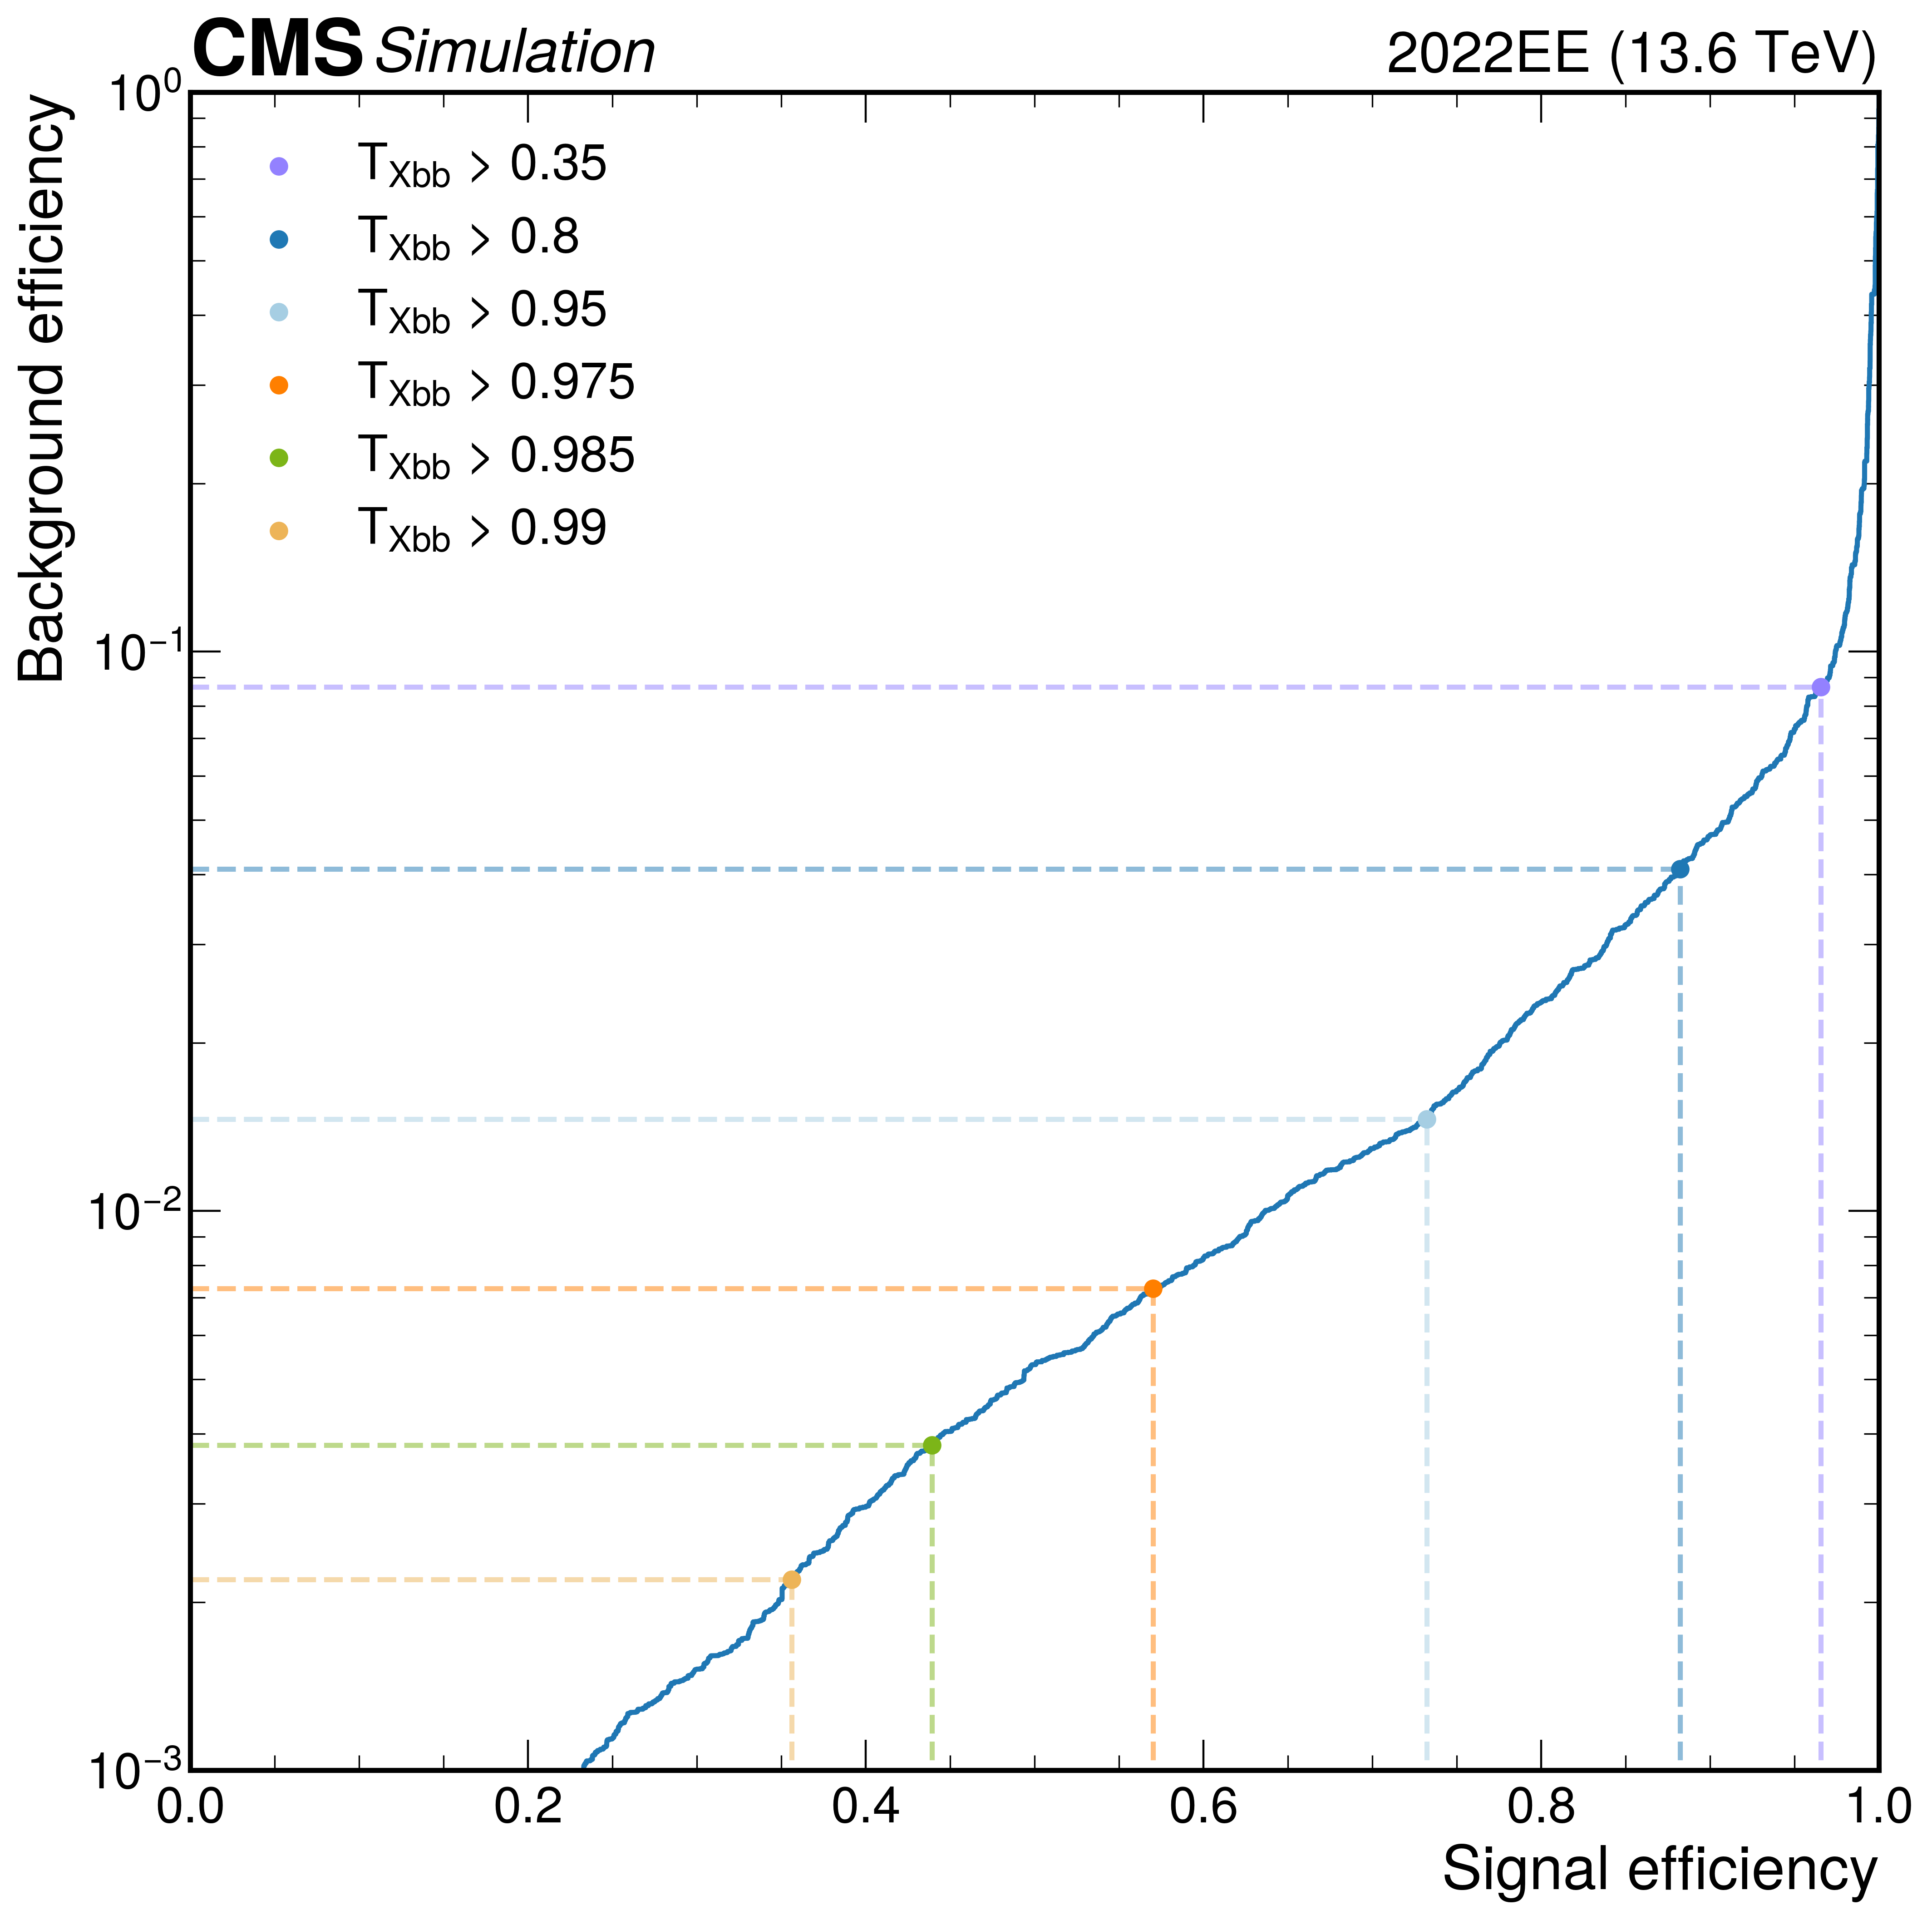

In [46]:
plot_thresholds = [0.35, 0.8, 0.95, 0.975, 0.985, 0.99]
th_colours = ["#9381FF", "#1f78b4", "#a6cee3", "#ff7f00", "#7CB518", "#EDB458", "#36213E"]

pths = {th: [[], []] for th in plot_thresholds}
plt.figure(figsize=(12, 12))
plt.plot(
    tpr,
    fpr,
    linewidth=2,
)

for th in plot_thresholds:
    idx = find_nearest(thresholds, th)
    pths[th][0].append(tpr[idx])
    pths[th][1].append(fpr[idx])


for k, th in enumerate(plot_thresholds):
    plt.scatter(
        *pths[th],
        marker="o",
        s=40,
        label=rf"$T_{{Xbb}}$ > {th}",
        color=th_colours[k],
        zorder=100,
    )

    plt.vlines(
        x=pths[th][0],
        ymin=0,
        ymax=pths[th][1],
        color=th_colours[k],
        linestyles="dashed",
        alpha=0.5,
    )

    plt.hlines(
        y=pths[th][1],
        xmin=0,
        xmax=pths[th][0],
        color=th_colours[k],
        linestyles="dashed",
        alpha=0.5,
    )


hep.cms.label(data=False, year=year, com="13.6")
# plt.hlines(y=0.01, xmin=0, xmax=1, colors="lightgrey", linestyles="dashed")
plt.yscale("log")
plt.xlabel("Signal efficiency")
plt.ylabel("Background efficiency")
# plt.suptitle(f"HVV FatJet {pvars['title']} ROC", y=0.95)
# plt.title(cut_labels[cutstr], fontsize=20)
plt.xlim([0, 1])
plt.ylim([1e-3, 1])
plt.legend(loc="upper left")
plt.savefig(f"{plot_dir}/roccurve.pdf", bbox_inches="tight")

### Cut-based selection

In [ ]:
bb_masks = postprocessing.bb_assignment(events_dict)

In [ ]:
# {label: {cutvar: [min, max], ...}, ...}
txbb_cut = 0.985
pt_cut = 300

selection_regions = {
    "pass": Region(
        cuts={
            "bb0FatJetPNetXbb": [txbb_cut, CUT_MAX_VAL],
            "bb1FatJetPNetXbb": [txbb_cut, CUT_MAX_VAL],
            "bb0FatJetPt": [pt_cut, CUT_MAX_VAL],
            "bb1FatJetPt": [pt_cut, CUT_MAX_VAL],
            "bb0FatJetPNetMass": [100, 150],
        },
        label="Pass",
    ),
    "fail": Region(
        cuts={
            "bb0FatJetPNetXbb": [-CUT_MAX_VAL, txbb_cut],
            "bb1FatJetPNetXbb": [-CUT_MAX_VAL, txbb_cut],
            "bb0FatJetPt": [pt_cut, CUT_MAX_VAL],
            "bb1FatJetPt": [pt_cut, CUT_MAX_VAL],
            "bb0FatJetPNetMass": [100, 150],
        },
        label="Fail",
    ),
}

fit_shape_var = ShapeVar(
    "bb1FatJetPNetMass",
    r"$m^{2}_\mathrm{Reg}$ (GeV)",
    [19, 60, 250],
    reg=True,
    blind_window=[100, 150],
)

In [ ]:
templates = postprocessing.get_templates(
    events_dict,
    bb_masks,
    year,
    sig_keys,
    selection_regions,
    [fit_shape_var],
    {},
    template_dir,
    bg_keys,
    plot_dir,
    cutflow,
    weight_key="weight",
    # weight_shifts=weight_shifts,
    show=True,
)

In [ ]:
templates

In [ ]:
postprocessing.save_templates(
    templates,
    f"{template_dir}/{year}_templates.pkl",
    fit_shape_var,
)

In [ ]:
import pickle

with open(f"templates/23Oct17/{year}_templates.pkl", "rb") as f:
    templates2 = pickle.load(f)